<a href="https://colab.research.google.com/github/kalyanGITHUB2004/DL/blob/main/EX_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.1609 - loss: 3.6495 - val_accuracy: 0.5396 - val_loss: 2.7308
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4365 - loss: 2.6430 - val_accuracy: 0.5904 - val_loss: 1.8048
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5374 - loss: 1.9104 - val_accuracy: 0.6523 - val_loss: 1.5527
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6004 - loss: 1.6443 - val_accuracy: 0.6839 - val_loss: 1.4253
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6413 - loss: 1.4716 - val_accuracy: 0.6915 - val_loss: 1.3478
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6687 - loss: 1.3857 - val_accuracy: 0.6963 - val_loss: 1.2865
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6898 - loss: 1.2903 - val_accuracy: 0.7097 - val_loss: 1.2338
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7205 - loss: 1.1641 - val_accuracy: 0.7235 - 

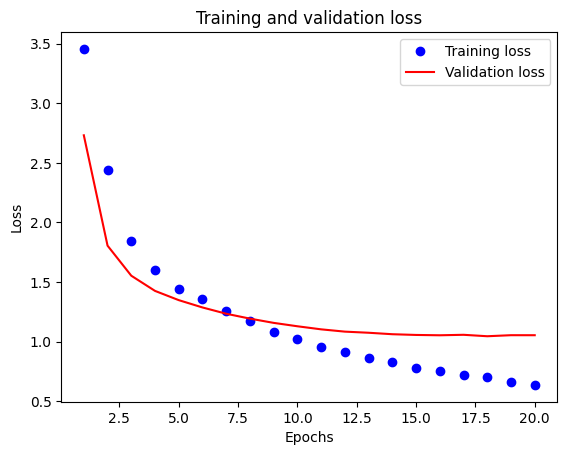

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[ 7  2  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  4 12 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.59      0.82      0.68       105
           2       0.55      0.60      0.57        20
           3       0.92      0.94      0.93       813
           4       0.80      0.90      0.85       474
           5       0.00      0.00      0.00         5
           6       0.73      0.79      0.76        14
           7       0.00      0.00      0.00         3
           8       0.67      0.68      0.68        38
           9       0.78      0.72      0.75        25
          10       0.92      0.80      0.86        30
          11       0.59      0.76      0.66        83
          12       0.50      0.08      0.13        13
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)
